In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print (len(trainset))
print (len(trainloader))

50000
12500


In [ ]:
trainset[1]

(tensor([[[ 0.2078, -0.0118, -0.1765,  ..., -0.2863, -0.3176, -0.3804],
          [ 0.0980,  0.1373, -0.0196,  ..., -0.2471, -0.3961, -0.4431],
          [ 0.0980,  0.0902, -0.0980,  ..., -0.3804, -0.4667, -0.4745],
          ...,
          [ 0.3725,  0.2235,  0.2078,  ..., -0.6706, -0.5216, -0.2706],
          [ 0.2941,  0.2235,  0.2471,  ..., -0.1922, -0.0353,  0.0275],
          [ 0.2784,  0.2392,  0.2784,  ...,  0.1216,  0.1216,  0.1216]],
 
         [[ 0.3882,  0.0745, -0.1843,  ..., -0.2549, -0.2941, -0.3647],
          [ 0.2549,  0.2000, -0.0196,  ..., -0.2235, -0.3725, -0.4275],
          [ 0.2157,  0.1451, -0.0980,  ..., -0.3569, -0.4510, -0.4588],
          ...,
          [ 0.3098,  0.2078,  0.2549,  ..., -0.7333, -0.5843, -0.3490],
          [ 0.2078,  0.1922,  0.2627,  ..., -0.2706, -0.1059, -0.0510],
          [ 0.1608,  0.1608,  0.2235,  ...,  0.0431,  0.0510,  0.0431]],
 
         [[ 0.4667,  0.0667, -0.2549,  ..., -0.4431, -0.4431, -0.4510],
          [ 0.3255,  0.2078,

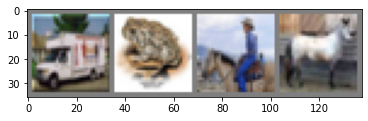


truck  frog horse horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 16, 3)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        # x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)#.to(device)
        # print('inputs.shape',inputs.shape)
        # print('outputs.shape',outputs.shape)
        # print('labels.shape',labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.297
[1,  4000] loss: 2.061
[1,  6000] loss: 1.886
[1,  8000] loss: 1.714
[1, 10000] loss: 1.614
[1, 12000] loss: 1.546
[2,  2000] loss: 1.490
[2,  4000] loss: 1.425
[2,  6000] loss: 1.421
[2,  8000] loss: 1.415
[2, 10000] loss: 1.395
[2, 12000] loss: 1.367
[3,  2000] loss: 1.324
[3,  4000] loss: 1.331
[3,  6000] loss: 1.288
[3,  8000] loss: 1.282
[3, 10000] loss: 1.271
[3, 12000] loss: 1.258
[4,  2000] loss: 1.204
[4,  4000] loss: 1.215
[4,  6000] loss: 1.202
[4,  8000] loss: 1.213
[4, 10000] loss: 1.202
[4, 12000] loss: 1.188
[5,  2000] loss: 1.137
[5,  4000] loss: 1.120
[5,  6000] loss: 1.136
[5,  8000] loss: 1.123
[5, 10000] loss: 1.147
[5, 12000] loss: 1.133
[6,  2000] loss: 1.061
[6,  4000] loss: 1.099
[6,  6000] loss: 1.090
[6,  8000] loss: 1.076
[6, 10000] loss: 1.107
[6, 12000] loss: 1.089
[7,  2000] loss: 1.024
[7,  4000] loss: 1.044
[7,  6000] loss: 1.055
[7,  8000] loss: 1.046
[7, 10000] loss: 1.058
[7, 12000] loss: 1.047
[8,  2000] loss: 1.006
[8,  4000] 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

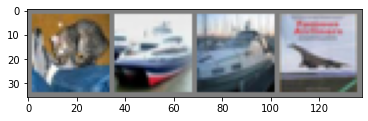

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
 _, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # images, labels = images.cuda(), labels.cuda()
        outputs = net(images)#.cuda()
        # outputs.cuda()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # images, labels = images.cuda(), labels.cuda()
        # outputs.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 78 %
Accuracy of  bird : 47 %
Accuracy of   cat : 47 %
Accuracy of  deer : 51 %
Accuracy of   dog : 46 %
Accuracy of  frog : 74 %
Accuracy of horse : 50 %
Accuracy of  ship : 76 %
Accuracy of truck : 54 %
